# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [4]:
#Look and feel of data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [7]:
df.shape

(4177, 9)

4177 rows and 9 columns, we must check for any duplicates

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(4177, 9)

No duplicate data found in dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


Only 'sex' column is object type in this dataset

In [20]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [15]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

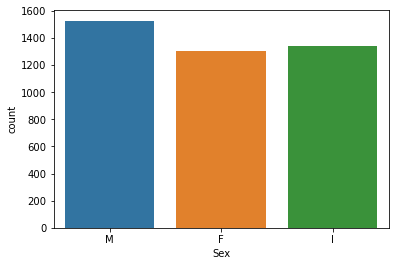

In [19]:
sns.countplot (x='Sex', data = df)
plt.show()

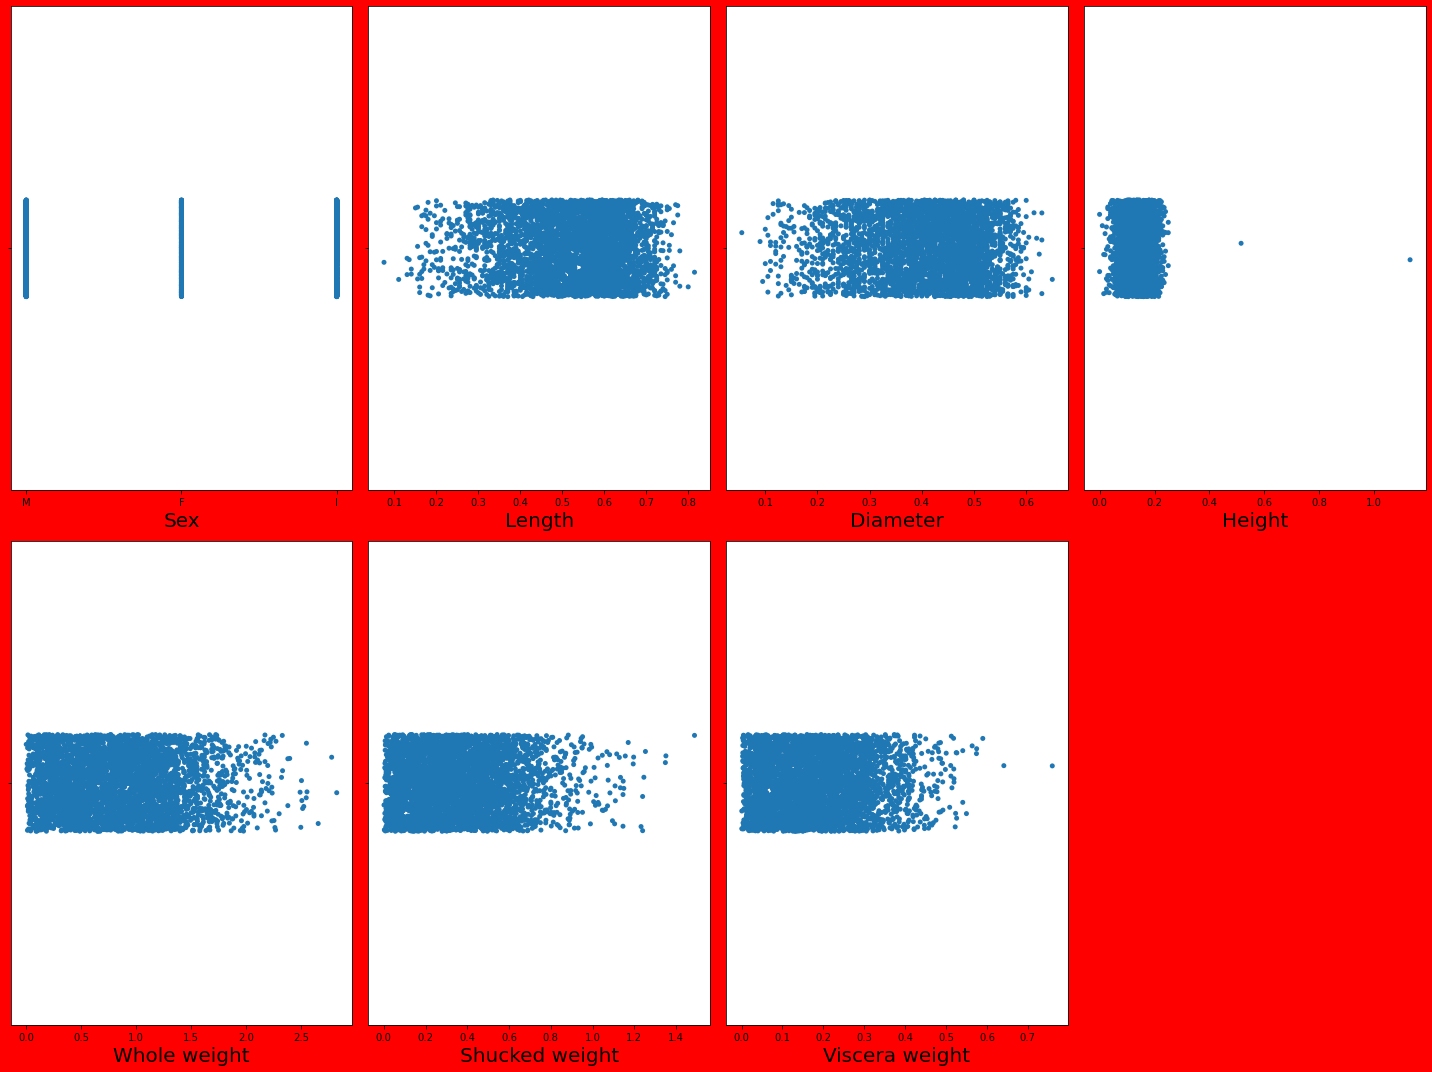

In [29]:
plt.figure(figsize = (20,15), facecolor = 'red',edgecolor ='Yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <8: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.stripplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


1. Std is high for Whole weight
2. Skewness id observed

In [31]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

1. No Null Values found

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 486.3+ KB


We need to encode the 'Sex' column

In [34]:
from sklearn.preprocessing import LabelEncoder #Using Label Encoder

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


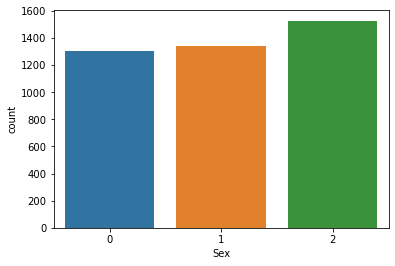

In [35]:
sns.countplot (x='Sex', data = df)
plt.show()

Here 0 is females, 1 is infants and 2 is male

In [36]:
#Since the age is +1.5 of the number of rings, we can convert the rings columns to directly represent abalone's age.

df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1) #Dropping the rings column

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 486.3 KB


In [38]:
df.sample(4)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
3275,2,0.460,0.355,0.110,0.4150,0.215,0.0820,0.130,13.5
1646,1,0.580,0.445,0.125,0.7095,0.303,0.1405,0.235,10.5
3719,1,0.380,0.280,0.095,0.2885,0.165,0.0435,0.067,8.5
3640,1,0.445,0.345,0.120,0.4035,0.169,0.0825,0.130,8.5


In [39]:
#Checking the Relationship of features with Label

df.corr()['age'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
age               1.000000
Name: age, dtype: float64

Except sex, all the features have considerable co-relation with the label

<AxesSubplot:>

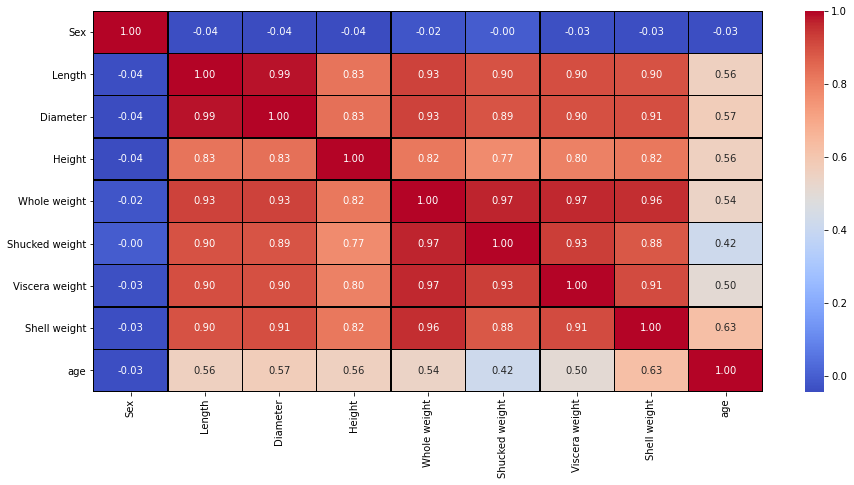

In [41]:
#Graphical representation of relationships
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f',cmap = 'coolwarm') 

Clearly sex has least correlation with the label, it can be dropped

In [43]:
#Dropping sex column
df = df.drop (columns = ['Sex'])
df.sample(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
2537,0.660,0.525,0.215,1.7860,0.6725,0.3615,0.4065,12.5
3437,0.395,0.300,0.090,0.2790,0.1340,0.0490,0.0750,9.5
2120,0.425,0.325,0.100,0.3295,0.1365,0.0725,0.1100,8.5


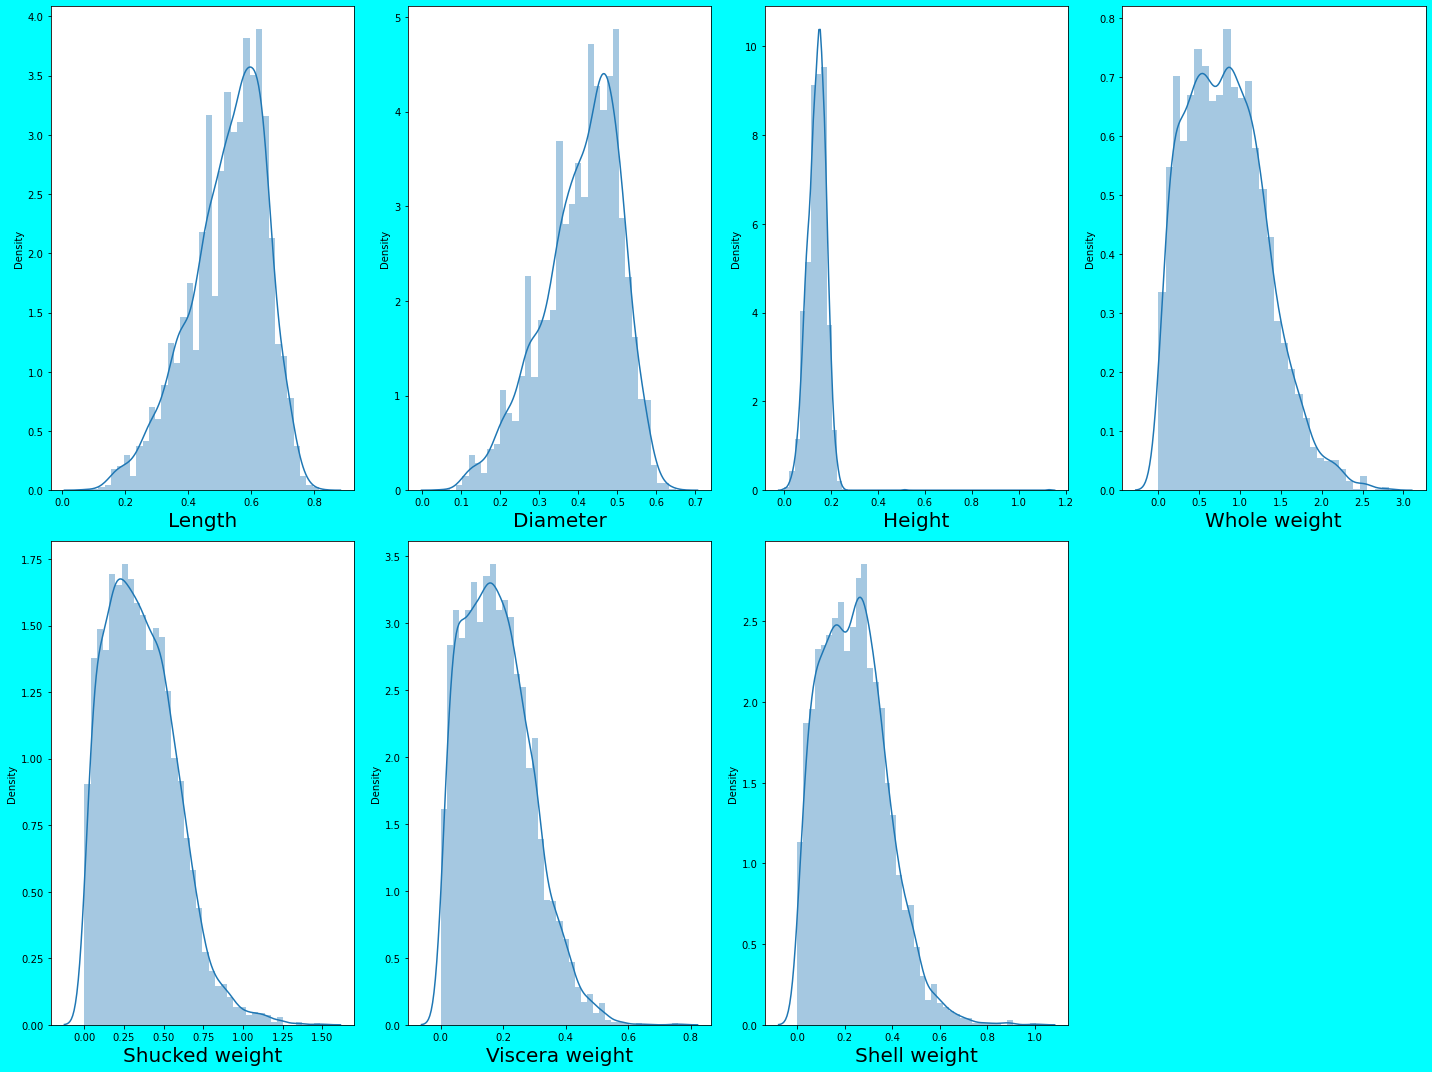

In [46]:
#Checking the distribution

plt.figure(figsize = (20,15), facecolor = 'Cyan')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <8: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

In [47]:
#Checking the outlier

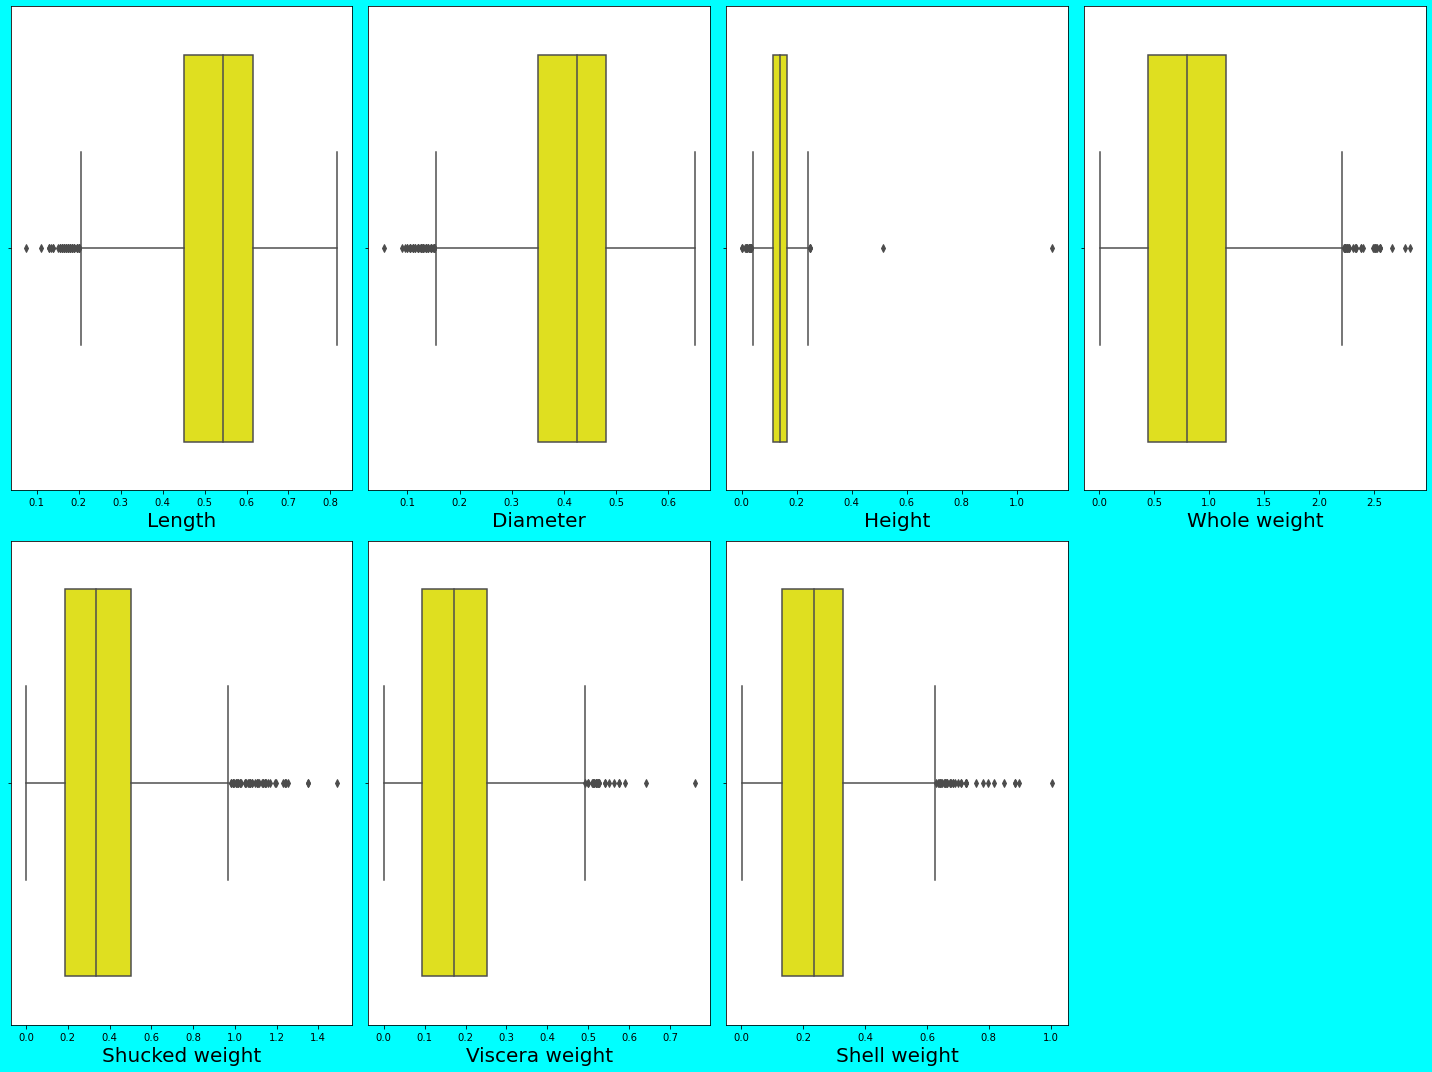

In [55]:
plt.figure(figsize = (20,15), facecolor = 'Cyan')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <8: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.boxplot (df [column],color = 'yellow', orient = 'v')
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

many outliers are visible

# Using Z-Score for outliers removal

In [57]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [63]:
from scipy.stats import zscore

z_score = zscore (df)
abs_z_score = np.abs(z_score)
filtering_entry = ((abs_z_score < 3).all(axis=1))
df1 = df[filtering_entry]
df1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


Earlier 4177 entries were there and now after removal of outliers we have 4027 entries left

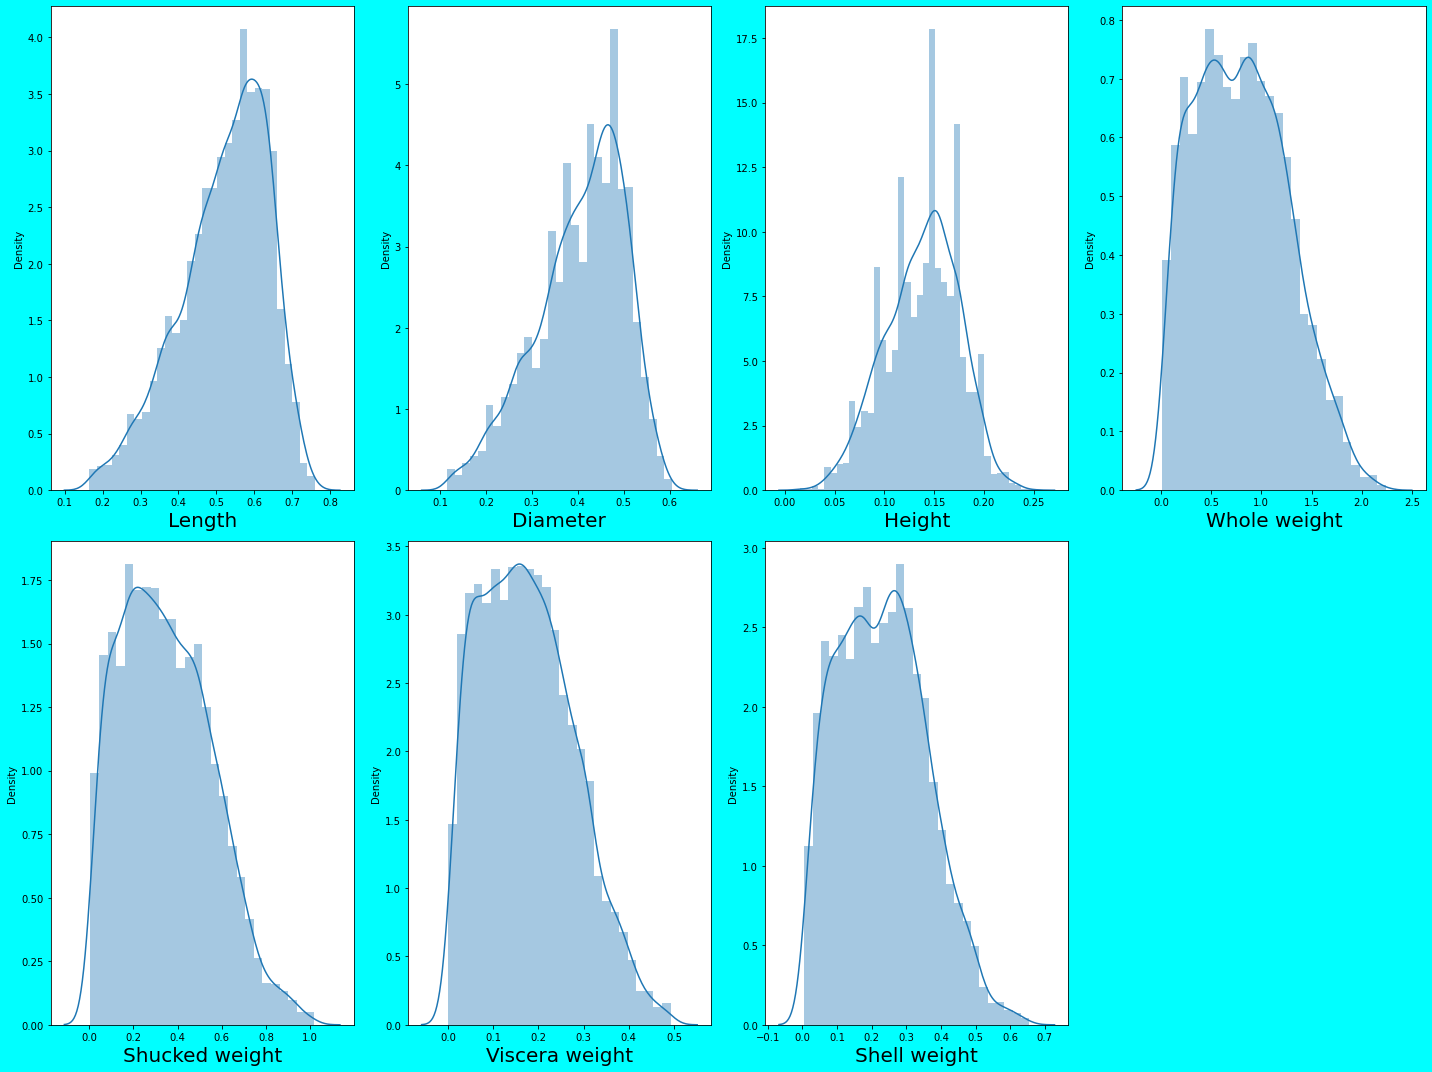

In [69]:
#Checking the distribution again

plt.figure(figsize = (20,15), facecolor = 'Cyan')
plotnumber = 1 #this is an initiator

for column in df1:
    if plotnumber <8: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df1 [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

In [70]:
df1.skew().sort_values().abs()

Length            0.623076
Diameter          0.598650
Height            0.244251
Whole weight      0.334204
Shell weight      0.349471
Viscera weight    0.437116
Shucked weight    0.458295
age               0.725464
dtype: float64

# Using Power Transform for skewness removal

In [71]:
#Separating features and label
x=df1.drop('age', axis=1)
y= df1.age

In [73]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method ='yeo-johnson')
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [76]:
pd.DataFrame(x).skew().abs()

0    0.082985
1    0.080956
2    0.015962
3    0.016797
4    0.021815
5    0.035902
6    0.016660
dtype: float64

In [79]:
x = pd.DataFrame(x, columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'])

In [80]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926
...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520


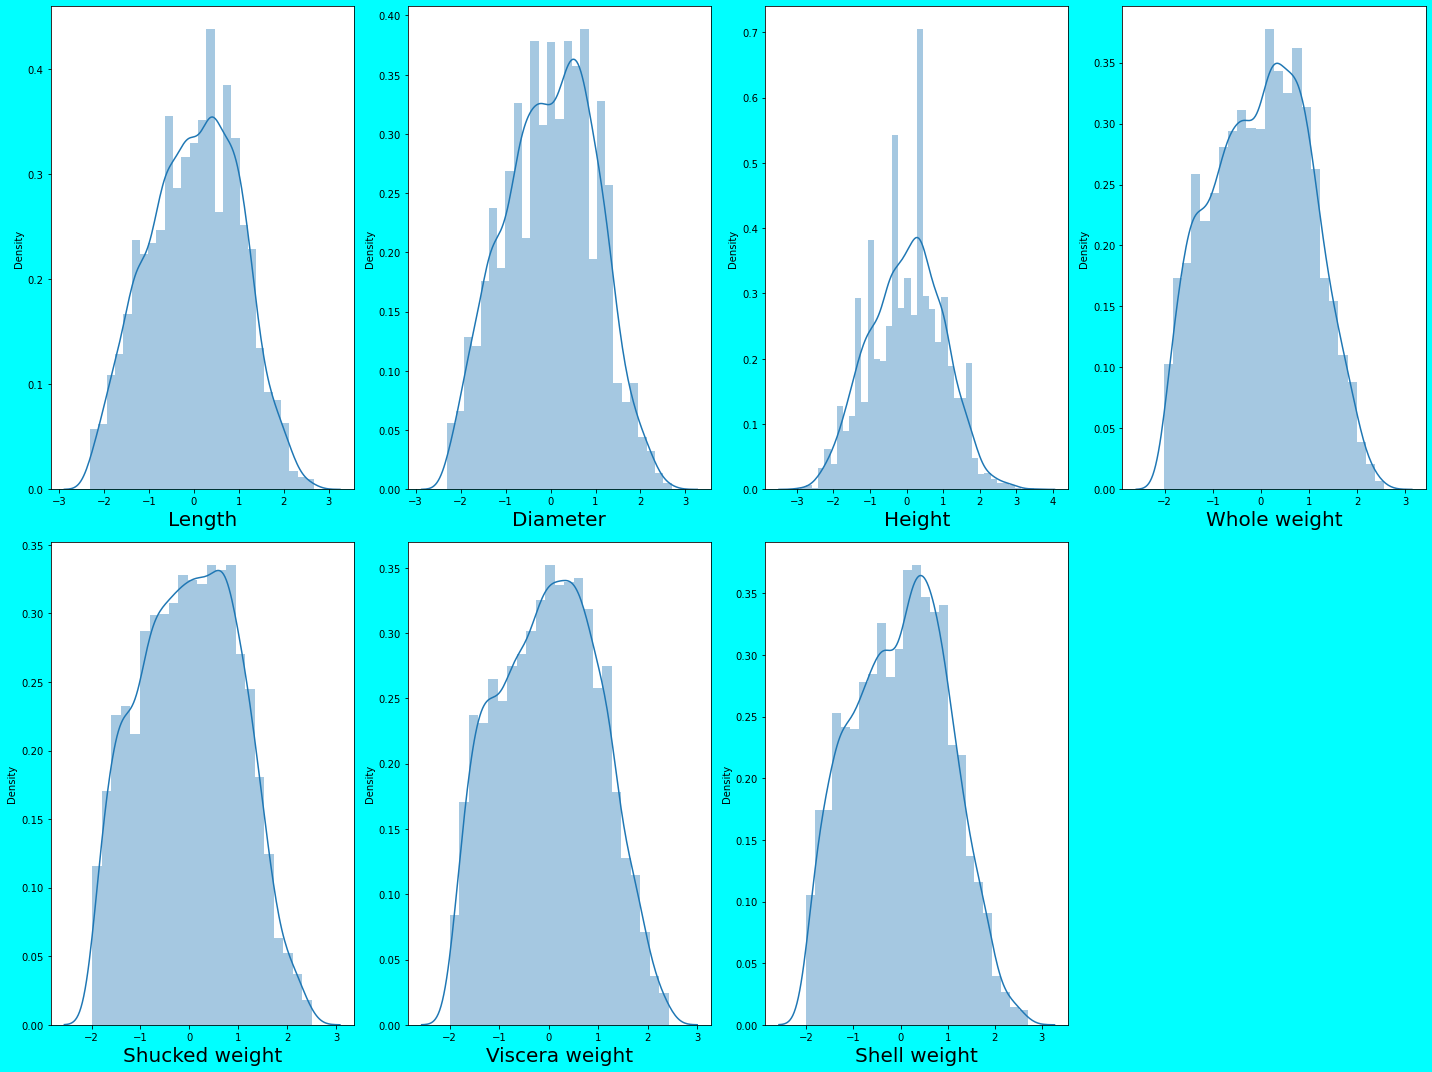

In [81]:
#Checking the distribution again

plt.figure(figsize = (20,15), facecolor = 'Cyan')
plotnumber = 1 #this is an initiator

for column in x:
    if plotnumber <8: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (x [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

# Skewness in considerably removed

# Scaling the features

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

# Checking Multicollinearity

In [92]:
#Checking for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor (x_scaled, i) for i in range (x_scaled.shape[1])]
vif["features"] = x.columns  #here, vif and features are column names
vif

,vif,features
0,34.535988,Length
1,33.473119,Diameter
2,6.522491,Height
3,136.044259,Whole weight
4,36.139159,Shucked weight
5,21.919385,Viscera weight
6,30.120461,Shell weight


Multicollinearity is present in 'Whole Weight', hence dropping the column

In [93]:
x = x.drop (columns = ['Whole weight'])
x

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,-0.684451,-0.543379,-1.158933,-0.540865,-0.688032,-0.586354
1,-1.411739,-1.401132,-1.280406,-1.311318,-1.332854,-1.332717
2,-0.046219,0.037163,-0.128305,-0.362705,-0.240373,-0.080214
3,-0.799651,-0.543379,-0.395963,-0.592261,-0.539936,-0.542533
4,-1.530577,-1.474343,-1.518600,-1.378735,-1.451548,-1.482926
...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.217107,0.690782,0.227258
4023,0.545081,0.269661,-0.128305,0.534924,0.474179,0.314936
4024,0.651129,0.705921,1.943633,0.901897,1.089651,0.663632
4025,0.926064,0.837713,0.286070,0.924153,0.876428,0.577520


# Model Building

In [94]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.2, random_state = i)
    lr.fit (x_train, y_train)
    pred_train = lr.predict (x_train)
    pred_test = lr.predict (x_test)
    print (f"At random state {i}, the training accuracy is: {r2_score (y_train, pred_train)}")
    print (f"At random state {i}, the testing accuracy is: {r2_score (y_test, pred_test)}")
    print ('\n') 

At random state 0, the training accuracy is: 0.5194015397051894
At random state 0, the testing accuracy is: 0.4818046116904148


At random state 1, the training accuracy is: 0.5179011850610884
At random state 1, the testing accuracy is: 0.48670415771013975


At random state 2, the training accuracy is: 0.5139840625880676
At random state 2, the testing accuracy is: 0.505500840979024


At random state 3, the training accuracy is: 0.513555169942806
At random state 3, the testing accuracy is: 0.5064903530914773


At random state 4, the training accuracy is: 0.5110098292405982
At random state 4, the testing accuracy is: 0.5169136151654445


At random state 5, the training accuracy is: 0.5173884163702163
At random state 5, the testing accuracy is: 0.49133735623010133


At random state 6, the training accuracy is: 0.5104395562923103
At random state 6, the testing accuracy is: 0.5185254385636002


At random state 7, the training accuracy is: 0.5211341515659549
At random state 7, the testing ac

At random state 30, the difference between training accuracy and testing accuracy is the least

In [95]:
#Actually splitting the data set
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.25, random_state = 30)
y_test.head()

637      7.5
2583     9.5
3222    19.5
878     10.5
235     10.5
Name: age, dtype: float64

# 1. Using Linear Regression

In [96]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [99]:
reg.score(x_train, y_train) #training score

0.5150306233290647

In [100]:
reg.score(x_test, y_test) #testing score

0.5018521729579348

In [101]:
#R2 Score
from sklearn.metrics import r2_score
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)*100

50.185217295793485

# 2. Using Ridge

In [106]:
from sklearn.linear_model import Ridge
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)
ridge_mod.fit(x_test, y_test)
ridge_model_pred = ridge_mod.predict(x_test)
ridge_mod.score(x_train, y_train)


0.5069816924789509

In [112]:
ridge_mod.score(x_test, y_test)

0.49652840035575707

In [144]:
#R2 Score
from sklearn.metrics import r2_score
y_pred = ridge_mod.predict(x_test)
r2_score(y_test, y_pred)*100

49.65284003557571

# 3. Using SVR

In [104]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)
svr.fit(x_test, y_test)

y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

svr.score(x_train, y_train)

0.4797238472357347

In [111]:
svr.score(x_test, y_test)

0.4868049375121656

In [145]:
#R2 Score
from sklearn.metrics import r2_score
y_pred = svr.predict(x_test)
r2_score(y_test, y_pred)*100

48.68049375121656

# 4. Using KNN Regressor

In [114]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)


knn.score(x_train, y_train)

0.4384883783203215

In [115]:
knn.score(x_test, y_test)

0.6479407566212321

In [146]:
#R2 Score
from sklearn.metrics import r2_score
y_pred = knn.predict(x_test)
r2_score(y_test, y_pred)*100

64.7940756621232

# 5. Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
regr.fit(x_train, y_train)
regr.fit(x_test, y_test)
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

regr.score(x_train, y_train)

0.4107594601476341

In [118]:
regr.score(x_test, y_test)

0.42154526099221

In [147]:
#R2 Score
from sklearn.metrics import r2_score
y_pred = regr.predict(x_test)
r2_score(y_test, y_pred)*100

42.154526099221

# 6. Gradient Boosting Regressor

In [124]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr.fit(x_test, y_test)

y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)


gbr.score(x_train, y_train)

0.5202601499304025

In [125]:
gbr.score(x_test, y_test)

0.7137136694410524

In [148]:
#R2 Score
from sklearn.metrics import r2_score
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)*100

71.37136694410525

# The R2 score is best for Gradient Boosting Regressor (71.371)

In [150]:
#Comparing the original data with predicted data using GBR Model

a = np.array(y_test)
predicted=np.array(gbr.predict(x_test))
df_com=pd.DataFrame({"orignal_data":a,"predicted_data":predicted},index=range(len(a)))
df_com.sample(15)

,orignal_data,predicted_data
834,12.50,12.69
691,7.50,7.17
477,8.50,8.14
3,10.50,11.34
143,11.50,11.89
212,10.50,12.02
430,8.50,8.11
203,12.50,11.48
759,13.50,14.70
92,9.50,9.16


<AxesSubplot:>

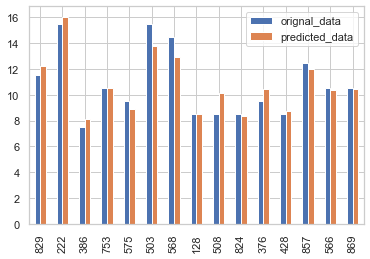

In [152]:
df_com.sample(15).plot(kind = 'bar')

# Thank You